In [1]:
import pandas as pd
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt
import numpy as np

/Applications/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('../data/basic_data.csv')

In [3]:
data['log_closePrice'] = np.log(data['closePrice'])

In [4]:
colint_stock_list = []

for stock_i in range(50):

    stock_i_df = data[data['stock'] == stock_i]

    for stock_j in range(stock_i+1, 50):
        
        stock_j_df = data[data['stock'] == stock_j]

        outcome = coint(stock_i_df['log_closePrice'], stock_j_df['log_closePrice'])

        if outcome[1] < 0.05:
            colint_stock_list.append(([stock_i, stock_j], outcome))
            print(stock_i, stock_j)


3 18
9 18
10 34
10 37
12 18
13 43
18 19
18 20
18 29
18 30
18 34
18 37
18 42
18 44
18 48
20 29
20 34
20 42
22 39
33 39
35 41


3 18


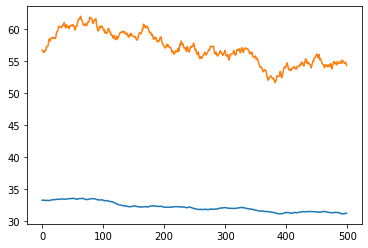

9 18


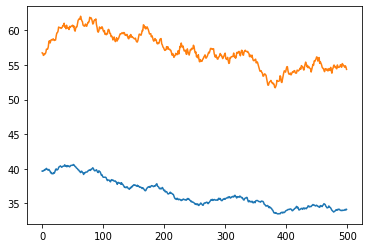

10 34


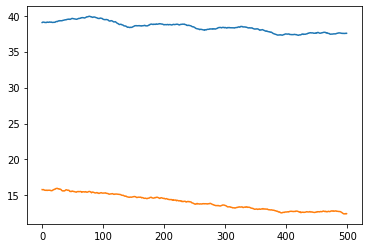

10 37


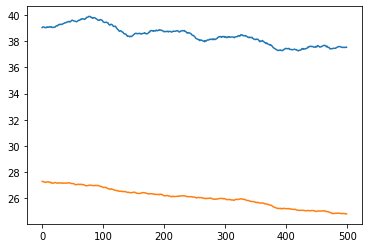

12 18


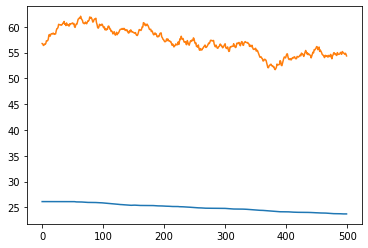

13 43


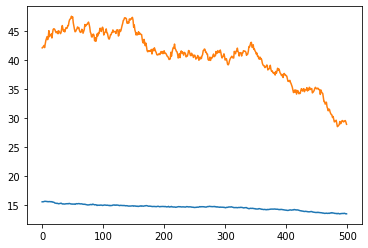

18 19


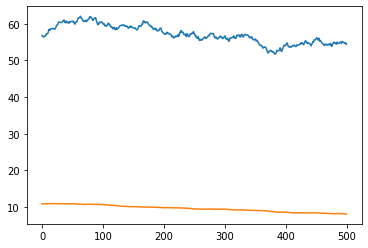

18 20


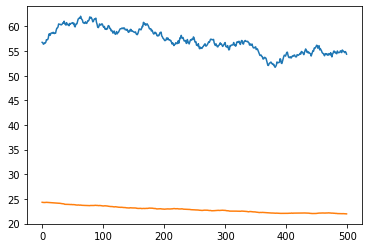

18 29


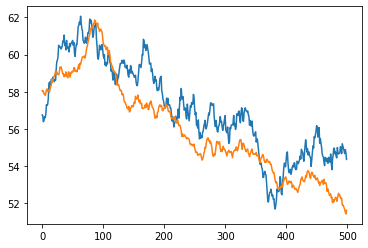

18 30


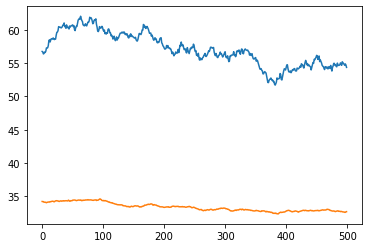

18 34


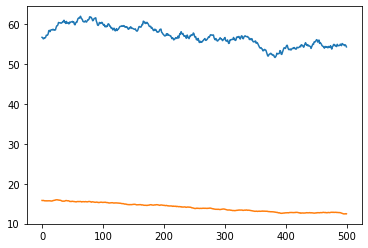

18 37


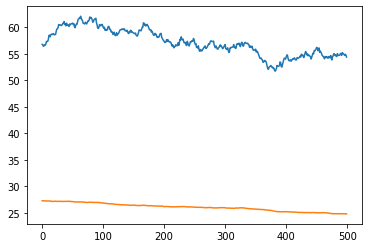

18 42


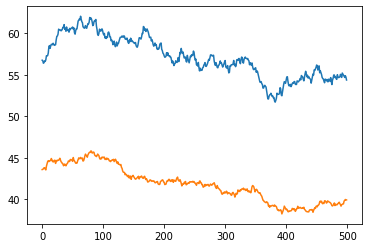

18 44


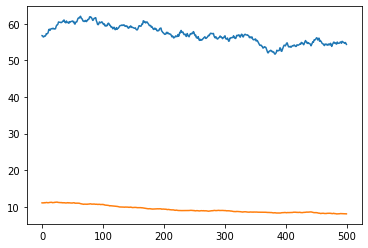

18 48


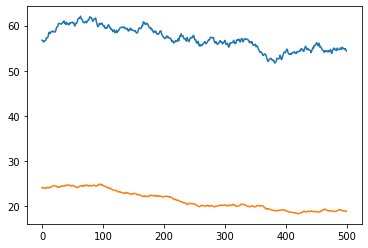

20 29


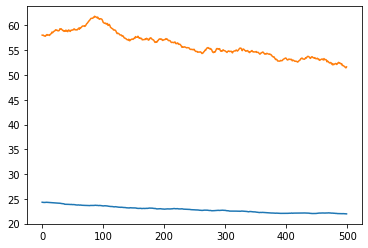

20 34


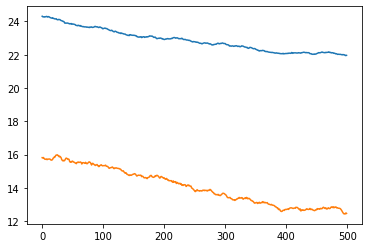

20 42


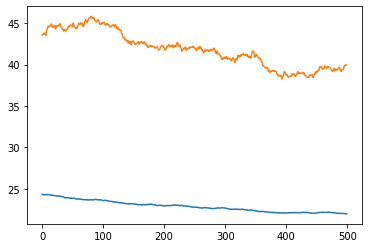

22 39


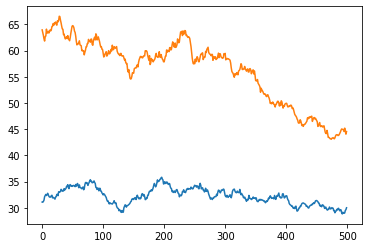

33 39


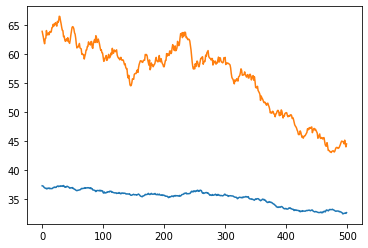

35 41


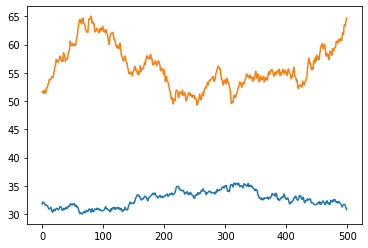

In [5]:
for ([stock_i, stock_j], outcome) in colint_stock_list:
    stock_i_df = data[data['stock'] == stock_i]
    stock_j_df = data[data['stock'] == stock_j]

    print(stock_i, stock_j)

    plt.plot(stock_i_df['date'], stock_i_df['closePrice'], label=stock_i)
    plt.plot(stock_j_df['date'], stock_j_df['closePrice'], label=stock_j)
    plt.show()


In [6]:
colint_stock_list_ct = []

for stock_i in range(50):

    stock_i_df = data[data['stock'] == stock_i]

    for stock_j in range(stock_i+1, 50):
        
        stock_j_df = data[data['stock'] == stock_j]

        outcome = coint(stock_i_df['log_closePrice'], stock_j_df['log_closePrice'], trend = 'ct')

        if outcome[1] < 0.05:
            colint_stock_list_ct.append(([stock_i, stock_j], outcome))
            print(stock_i, stock_j)


0 12
0 46
4 35
10 33
12 27
13 34
16 39
18 23
18 30
18 34
18 42
18 48
18 49
19 37
20 23
22 25
25 35
25 39
31 38
33 39
34 36
34 48
35 39
39 41


In [7]:
len(colint_stock_list_ct)

24

0 12


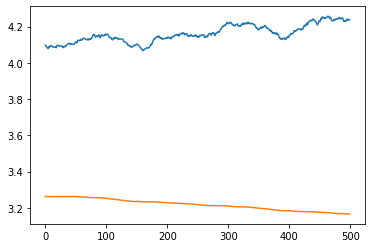

0 46


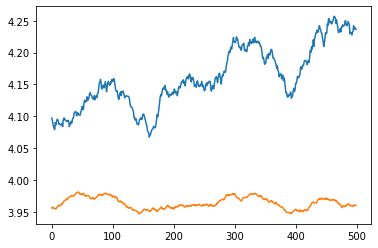

4 35


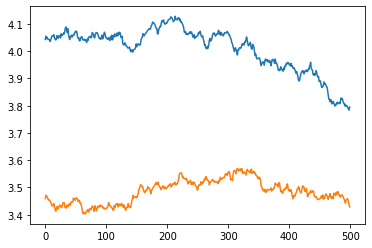

10 33


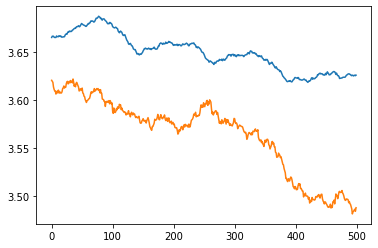

12 27


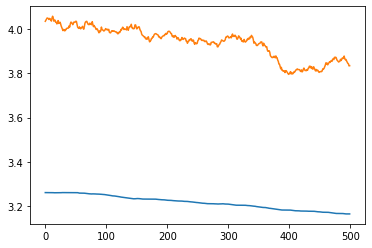

13 34


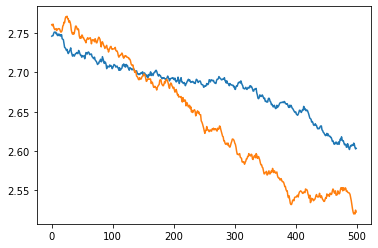

16 39


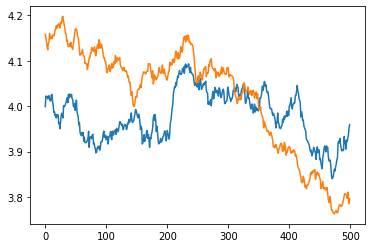

18 23


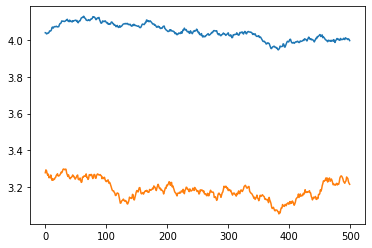

18 30


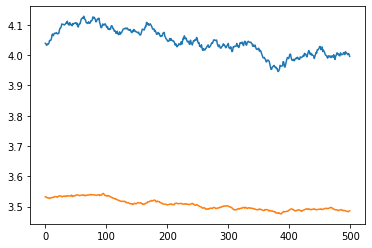

18 34


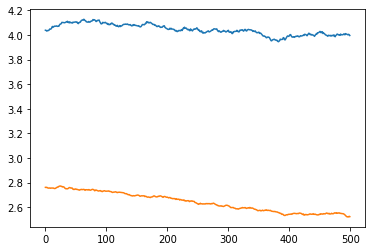

18 42


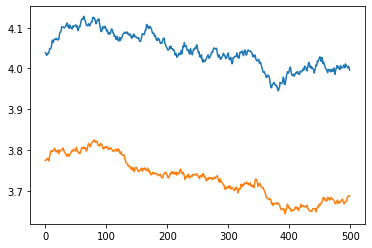

18 48


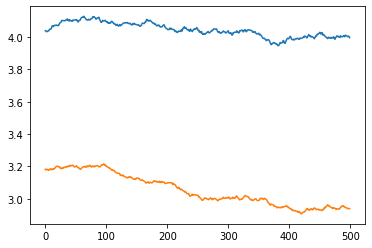

18 49


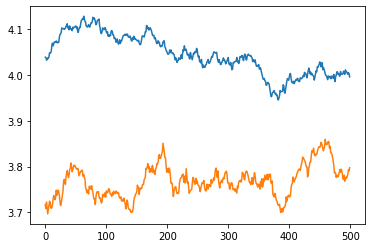

19 37


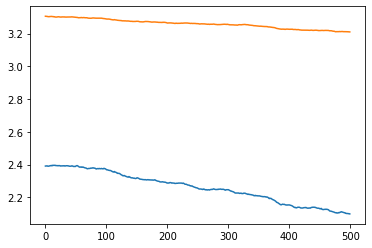

20 23


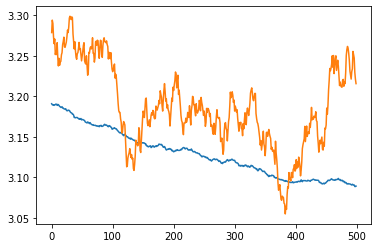

22 25


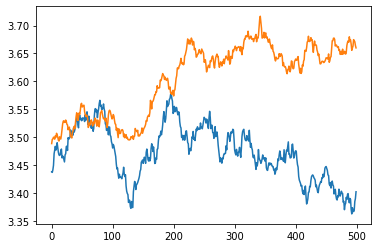

25 35


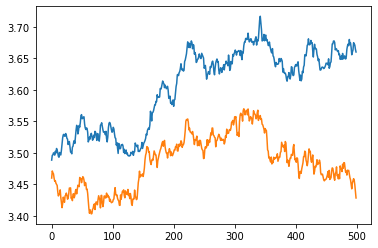

25 39


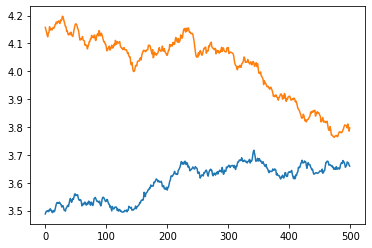

31 38


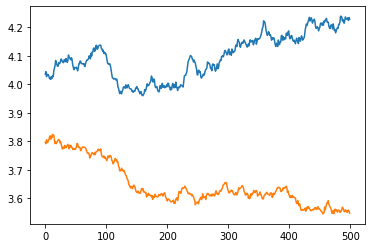

33 39


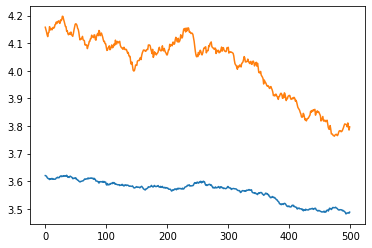

34 36


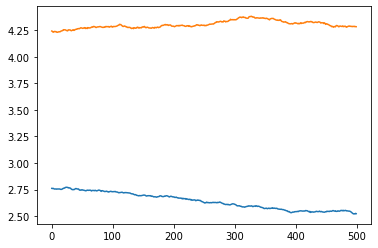

34 48


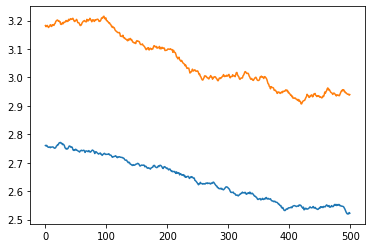

35 39


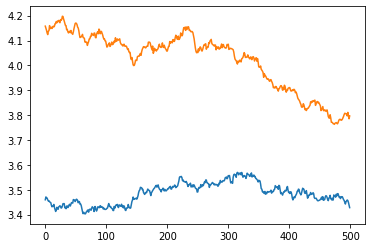

39 41


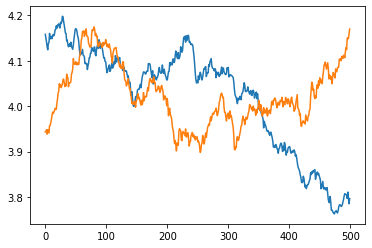

In [8]:
for ([stock_i, stock_j], outcome) in colint_stock_list_ct:
    stock_i_df = data[data['stock'] == stock_i]
    stock_j_df = data[data['stock'] == stock_j]

    print(stock_i, stock_j)

    plt.plot(stock_i_df['date'], stock_i_df['log_closePrice'], label=stock_i)
    plt.plot(stock_j_df['date'], stock_j_df['log_closePrice'], label=stock_j)
    plt.show()
